In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import datetime
from matplotlib import mlab
from scipy import stats
import psycopg2 as psql
from psycopg2.extras import RealDictCursor

import seaborn as sns
sns.set(color_codes=True)

In [25]:
try:
    conn = psql.connect("dbname='thesisdata' user='postgres' host='localhost' password='postgres'")
except Exception as e:
    print("Unable to connect to the database.")
    print(e)

max_inserts = 100
fetch_batch_size = max_inserts
cnt = 0

cur_read = conn.cursor(cursor_factory=RealDictCursor)
cur_read.execute("SELECT * FROM public.adsb_flights limit 10000;")
batch = cur_read.fetchall()

In [12]:
ep_list = []
for b in batch:
    ep_list.append(b['start_ep'])
    
sorted(list(set([datetime.datetime.fromtimestamp(t).strftime('%D') for t in ep_list])))

['04/30/18',
 '05/01/18',
 '05/02/18',
 '05/03/18',
 '05/04/18',
 '05/05/18',
 '05/06/18',
 '05/07/18',
 '05/08/18',
 '05/09/18',
 '05/10/18',
 '05/11/18',
 '05/12/18',
 '05/13/18',
 '05/14/18',
 '05/15/18',
 '09/01/18',
 '09/02/18',
 '09/03/18',
 '09/04/18',
 '09/05/18',
 '10/01/18',
 '10/02/18',
 '10/03/18',
 '10/04/18',
 '10/05/18',
 '10/06/18',
 '10/07/18',
 '10/08/18',
 '10/09/18',
 '10/10/18',
 '10/11/18',
 '10/20/17',
 '11/30/17',
 '12/01/17',
 '12/02/17']

In [58]:
la_times = [300,600,900,1200]
alt_dct  = {}
spd_dct = {}
hdg_dct = {}

for la in la_times:
    alt_dct[str(la)] = {}
    hdg_dct[str(la)] = {}
    spd_dct[str(la)] = {}
    
    alt_dct[str(la)]['vals'] = []
    hdg_dct[str(la)]['vals'] = []
    spd_dct[str(la)]['vals'] = []

blen = len(batch)
for i,f in enumerate(batch):
    
    print('Flight %d/%d' % (i,blen))
    fdf = pd.DataFrame.from_dict(f)

    #filters
    fdf = fdf[(fdf['alt'] >= 25000)]
    
    if len(fdf) == 0:
        continue
        
    fdf['time_el'] = fdf['ts'] - min(fdf['ts'].values)
    
    if max(fdf['time_el'].values) >= 1200:

        for i,la in enumerate(la_times):
            if i==0:
                alt_dct[str(la)]['vals'].extend(fdf['alt'][(fdf['time_el'] <= la) & (fdf['time_el'] >= 0)].values - fdf['alt'].iloc[0])
                spd_dct[str(la)]['vals'].extend(fdf['spd'][(fdf['time_el'] <= la) & (fdf['time_el'] >= 0)].values - fdf['spd'].iloc[0])
                hdg_dct[str(la)]['vals'].extend(fdf['hdg'][(fdf['time_el'] <= la) & (fdf['time_el'] >= 0)].values - fdf['hdg'].iloc[0])
            else:
                alt_dct[str(la)]['vals'].extend(fdf['alt'][(fdf['time_el'] <= la) & (fdf['time_el'] >= la_times[i-1])].values - fdf['alt'].iloc[0])
                spd_dct[str(la)]['vals'].extend(fdf['spd'][(fdf['time_el'] <= la) & (fdf['time_el'] >= la_times[i-1])].values - fdf['spd'].iloc[0])
                hdg_dct[str(la)]['vals'].extend(fdf['hdg'][(fdf['time_el'] <= la) & (fdf['time_el'] >= la_times[i-1])].values - fdf['hdg'].iloc[0])


for la in la_times:
    alt_dct[str(la)]['var'] = np.nanstd(alt_dct[str(la)]['vals'])
    alt_dct[str(la)]['mean'] = np.nanmean(alt_dct[str(la)]['vals'])
    alt_dct[str(la)]['kurt'] = stats.kurtosis(alt_dct[str(la)]['vals'])
    alt_dct[str(la)]['skew'] = stats.skew(alt_dct[str(la)]['vals'])
    
    spd_dct[str(la)]['var'] = np.nanstd(spd_dct[str(la)]['vals'])
    spd_dct[str(la)]['mean'] = np.nanmean(spd_dct[str(la)]['vals'])
    spd_dct[str(la)]['kurt'] = stats.kurtosis(spd_dct[str(la)]['vals'])
    spd_dct[str(la)]['skew'] = stats.skew(spd_dct[str(la)]['vals'])
    
    hdg_dct[str(la)]['var'] = np.nanstd(hdg_dct[str(la)]['vals'])
    hdg_dct[str(la)]['mean'] = np.nanmean(hdg_dct[str(la)]['vals'])
    hdg_dct[str(la)]['kurt'] = stats.kurtosis(hdg_dct[str(la)]['vals'])
    hdg_dct[str(la)]['skew'] = stats.skew(hdg_dct[str(la)]['vals'])

Flight 0/10000
Flight 1/10000
Flight 2/10000
Flight 3/10000
Flight 4/10000
Flight 5/10000
Flight 6/10000
Flight 7/10000
Flight 8/10000
Flight 9/10000
Flight 10/10000
Flight 11/10000
Flight 12/10000
Flight 13/10000
Flight 14/10000
Flight 15/10000
Flight 16/10000
Flight 17/10000
Flight 18/10000
Flight 19/10000
Flight 20/10000
Flight 21/10000
Flight 22/10000
Flight 23/10000
Flight 24/10000
Flight 25/10000
Flight 26/10000
Flight 27/10000
Flight 28/10000
Flight 29/10000
Flight 30/10000
Flight 31/10000
Flight 32/10000
Flight 33/10000
Flight 34/10000
Flight 35/10000
Flight 36/10000
Flight 37/10000
Flight 38/10000
Flight 39/10000
Flight 40/10000
Flight 41/10000
Flight 42/10000
Flight 43/10000
Flight 44/10000
Flight 45/10000
Flight 46/10000
Flight 47/10000
Flight 48/10000
Flight 49/10000
Flight 50/10000
Flight 51/10000
Flight 52/10000
Flight 53/10000
Flight 54/10000
Flight 55/10000
Flight 56/10000
Flight 57/10000
Flight 58/10000
Flight 59/10000
Flight 60/10000
Flight 61/10000
Flight 62/10000
Fl

Flight 489/10000
Flight 490/10000
Flight 491/10000
Flight 492/10000
Flight 493/10000
Flight 494/10000
Flight 495/10000
Flight 496/10000
Flight 497/10000
Flight 498/10000
Flight 499/10000
Flight 500/10000
Flight 501/10000
Flight 502/10000
Flight 503/10000
Flight 504/10000
Flight 505/10000
Flight 506/10000
Flight 507/10000
Flight 508/10000
Flight 509/10000
Flight 510/10000
Flight 511/10000
Flight 512/10000
Flight 513/10000
Flight 514/10000
Flight 515/10000
Flight 516/10000
Flight 517/10000
Flight 518/10000
Flight 519/10000
Flight 520/10000
Flight 521/10000
Flight 522/10000
Flight 523/10000
Flight 524/10000
Flight 525/10000
Flight 526/10000
Flight 527/10000
Flight 528/10000
Flight 529/10000
Flight 530/10000
Flight 531/10000
Flight 532/10000
Flight 533/10000
Flight 534/10000
Flight 535/10000
Flight 536/10000
Flight 537/10000
Flight 538/10000
Flight 539/10000
Flight 540/10000
Flight 541/10000
Flight 542/10000
Flight 543/10000
Flight 544/10000
Flight 545/10000
Flight 546/10000
Flight 547/100

Flight 971/10000
Flight 972/10000
Flight 973/10000
Flight 974/10000
Flight 975/10000
Flight 976/10000
Flight 977/10000
Flight 978/10000
Flight 979/10000
Flight 980/10000
Flight 981/10000
Flight 982/10000
Flight 983/10000
Flight 984/10000
Flight 985/10000
Flight 986/10000
Flight 987/10000
Flight 988/10000
Flight 989/10000
Flight 990/10000
Flight 991/10000
Flight 992/10000
Flight 993/10000
Flight 994/10000
Flight 995/10000
Flight 996/10000
Flight 997/10000
Flight 998/10000
Flight 999/10000
Flight 1000/10000
Flight 1001/10000
Flight 1002/10000
Flight 1003/10000
Flight 1004/10000
Flight 1005/10000
Flight 1006/10000
Flight 1007/10000
Flight 1008/10000
Flight 1009/10000
Flight 1010/10000
Flight 1011/10000
Flight 1012/10000
Flight 1013/10000
Flight 1014/10000
Flight 1015/10000
Flight 1016/10000
Flight 1017/10000
Flight 1018/10000
Flight 1019/10000
Flight 1020/10000
Flight 1021/10000
Flight 1022/10000
Flight 1023/10000
Flight 1024/10000
Flight 1025/10000
Flight 1026/10000
Flight 1027/10000
Fli

Flight 1429/10000
Flight 1430/10000
Flight 1431/10000
Flight 1432/10000
Flight 1433/10000
Flight 1434/10000
Flight 1435/10000
Flight 1436/10000
Flight 1437/10000
Flight 1438/10000
Flight 1439/10000
Flight 1440/10000
Flight 1441/10000
Flight 1442/10000
Flight 1443/10000
Flight 1444/10000
Flight 1445/10000
Flight 1446/10000
Flight 1447/10000
Flight 1448/10000
Flight 1449/10000
Flight 1450/10000
Flight 1451/10000
Flight 1452/10000
Flight 1453/10000
Flight 1454/10000
Flight 1455/10000
Flight 1456/10000
Flight 1457/10000
Flight 1458/10000
Flight 1459/10000
Flight 1460/10000
Flight 1461/10000
Flight 1462/10000
Flight 1463/10000
Flight 1464/10000
Flight 1465/10000
Flight 1466/10000
Flight 1467/10000
Flight 1468/10000
Flight 1469/10000
Flight 1470/10000
Flight 1471/10000
Flight 1472/10000
Flight 1473/10000
Flight 1474/10000
Flight 1475/10000
Flight 1476/10000
Flight 1477/10000
Flight 1478/10000
Flight 1479/10000
Flight 1480/10000
Flight 1481/10000
Flight 1482/10000
Flight 1483/10000
Flight 148

Flight 1886/10000
Flight 1887/10000
Flight 1888/10000
Flight 1889/10000
Flight 1890/10000
Flight 1891/10000
Flight 1892/10000
Flight 1893/10000
Flight 1894/10000
Flight 1895/10000
Flight 1896/10000
Flight 1897/10000
Flight 1898/10000
Flight 1899/10000
Flight 1900/10000
Flight 1901/10000
Flight 1902/10000
Flight 1903/10000
Flight 1904/10000
Flight 1905/10000
Flight 1906/10000
Flight 1907/10000
Flight 1908/10000
Flight 1909/10000
Flight 1910/10000
Flight 1911/10000
Flight 1912/10000
Flight 1913/10000
Flight 1914/10000
Flight 1915/10000
Flight 1916/10000
Flight 1917/10000
Flight 1918/10000
Flight 1919/10000
Flight 1920/10000
Flight 1921/10000
Flight 1922/10000
Flight 1923/10000
Flight 1924/10000
Flight 1925/10000
Flight 1926/10000
Flight 1927/10000
Flight 1928/10000
Flight 1929/10000
Flight 1930/10000
Flight 1931/10000
Flight 1932/10000
Flight 1933/10000
Flight 1934/10000
Flight 1935/10000
Flight 1936/10000
Flight 1937/10000
Flight 1938/10000
Flight 1939/10000
Flight 1940/10000
Flight 194

Flight 2343/10000
Flight 2344/10000
Flight 2345/10000
Flight 2346/10000
Flight 2347/10000
Flight 2348/10000
Flight 2349/10000
Flight 2350/10000
Flight 2351/10000
Flight 2352/10000
Flight 2353/10000
Flight 2354/10000
Flight 2355/10000
Flight 2356/10000
Flight 2357/10000
Flight 2358/10000
Flight 2359/10000
Flight 2360/10000
Flight 2361/10000
Flight 2362/10000
Flight 2363/10000
Flight 2364/10000
Flight 2365/10000
Flight 2366/10000
Flight 2367/10000
Flight 2368/10000
Flight 2369/10000
Flight 2370/10000
Flight 2371/10000
Flight 2372/10000
Flight 2373/10000
Flight 2374/10000
Flight 2375/10000
Flight 2376/10000
Flight 2377/10000
Flight 2378/10000
Flight 2379/10000
Flight 2380/10000
Flight 2381/10000
Flight 2382/10000
Flight 2383/10000
Flight 2384/10000
Flight 2385/10000
Flight 2386/10000
Flight 2387/10000
Flight 2388/10000
Flight 2389/10000
Flight 2390/10000
Flight 2391/10000
Flight 2392/10000
Flight 2393/10000
Flight 2394/10000
Flight 2395/10000
Flight 2396/10000
Flight 2397/10000
Flight 239

Flight 2800/10000
Flight 2801/10000
Flight 2802/10000
Flight 2803/10000
Flight 2804/10000
Flight 2805/10000
Flight 2806/10000
Flight 2807/10000
Flight 2808/10000
Flight 2809/10000
Flight 2810/10000
Flight 2811/10000
Flight 2812/10000
Flight 2813/10000
Flight 2814/10000
Flight 2815/10000
Flight 2816/10000
Flight 2817/10000
Flight 2818/10000
Flight 2819/10000
Flight 2820/10000
Flight 2821/10000
Flight 2822/10000
Flight 2823/10000
Flight 2824/10000
Flight 2825/10000
Flight 2826/10000
Flight 2827/10000
Flight 2828/10000
Flight 2829/10000
Flight 2830/10000
Flight 2831/10000
Flight 2832/10000
Flight 2833/10000
Flight 2834/10000
Flight 2835/10000
Flight 2836/10000
Flight 2837/10000
Flight 2838/10000
Flight 2839/10000
Flight 2840/10000
Flight 2841/10000
Flight 2842/10000
Flight 2843/10000
Flight 2844/10000
Flight 2845/10000
Flight 2846/10000
Flight 2847/10000
Flight 2848/10000
Flight 2849/10000
Flight 2850/10000
Flight 2851/10000
Flight 2852/10000
Flight 2853/10000
Flight 2854/10000
Flight 285

Flight 3256/10000
Flight 3257/10000
Flight 3258/10000
Flight 3259/10000
Flight 3260/10000
Flight 3261/10000
Flight 3262/10000
Flight 3263/10000
Flight 3264/10000
Flight 3265/10000
Flight 3266/10000
Flight 3267/10000
Flight 3268/10000
Flight 3269/10000
Flight 3270/10000
Flight 3271/10000
Flight 3272/10000
Flight 3273/10000
Flight 3274/10000
Flight 3275/10000
Flight 3276/10000
Flight 3277/10000
Flight 3278/10000
Flight 3279/10000
Flight 3280/10000
Flight 3281/10000
Flight 3282/10000
Flight 3283/10000
Flight 3284/10000
Flight 3285/10000
Flight 3286/10000
Flight 3287/10000
Flight 3288/10000
Flight 3289/10000
Flight 3290/10000
Flight 3291/10000
Flight 3292/10000
Flight 3293/10000
Flight 3294/10000
Flight 3295/10000
Flight 3296/10000
Flight 3297/10000
Flight 3298/10000
Flight 3299/10000
Flight 3300/10000
Flight 3301/10000
Flight 3302/10000
Flight 3303/10000
Flight 3304/10000
Flight 3305/10000
Flight 3306/10000
Flight 3307/10000
Flight 3308/10000
Flight 3309/10000
Flight 3310/10000
Flight 331

Flight 3713/10000
Flight 3714/10000
Flight 3715/10000
Flight 3716/10000
Flight 3717/10000
Flight 3718/10000
Flight 3719/10000
Flight 3720/10000
Flight 3721/10000
Flight 3722/10000
Flight 3723/10000
Flight 3724/10000
Flight 3725/10000
Flight 3726/10000
Flight 3727/10000
Flight 3728/10000
Flight 3729/10000
Flight 3730/10000
Flight 3731/10000
Flight 3732/10000
Flight 3733/10000
Flight 3734/10000
Flight 3735/10000
Flight 3736/10000
Flight 3737/10000
Flight 3738/10000
Flight 3739/10000
Flight 3740/10000
Flight 3741/10000
Flight 3742/10000
Flight 3743/10000
Flight 3744/10000
Flight 3745/10000
Flight 3746/10000
Flight 3747/10000
Flight 3748/10000
Flight 3749/10000
Flight 3750/10000
Flight 3751/10000
Flight 3752/10000
Flight 3753/10000
Flight 3754/10000
Flight 3755/10000
Flight 3756/10000
Flight 3757/10000
Flight 3758/10000
Flight 3759/10000
Flight 3760/10000
Flight 3761/10000
Flight 3762/10000
Flight 3763/10000
Flight 3764/10000
Flight 3765/10000
Flight 3766/10000
Flight 3767/10000
Flight 376

Flight 4171/10000
Flight 4172/10000
Flight 4173/10000
Flight 4174/10000
Flight 4175/10000
Flight 4176/10000
Flight 4177/10000
Flight 4178/10000
Flight 4179/10000
Flight 4180/10000
Flight 4181/10000
Flight 4182/10000
Flight 4183/10000
Flight 4184/10000
Flight 4185/10000
Flight 4186/10000
Flight 4187/10000
Flight 4188/10000
Flight 4189/10000
Flight 4190/10000
Flight 4191/10000
Flight 4192/10000
Flight 4193/10000
Flight 4194/10000
Flight 4195/10000
Flight 4196/10000
Flight 4197/10000
Flight 4198/10000
Flight 4199/10000
Flight 4200/10000
Flight 4201/10000
Flight 4202/10000
Flight 4203/10000
Flight 4204/10000
Flight 4205/10000
Flight 4206/10000
Flight 4207/10000
Flight 4208/10000
Flight 4209/10000
Flight 4210/10000
Flight 4211/10000
Flight 4212/10000
Flight 4213/10000
Flight 4214/10000
Flight 4215/10000
Flight 4216/10000
Flight 4217/10000
Flight 4218/10000
Flight 4219/10000
Flight 4220/10000
Flight 4221/10000
Flight 4222/10000
Flight 4223/10000
Flight 4224/10000
Flight 4225/10000
Flight 422

Flight 4627/10000
Flight 4628/10000
Flight 4629/10000
Flight 4630/10000
Flight 4631/10000
Flight 4632/10000
Flight 4633/10000
Flight 4634/10000
Flight 4635/10000
Flight 4636/10000
Flight 4637/10000
Flight 4638/10000
Flight 4639/10000
Flight 4640/10000
Flight 4641/10000
Flight 4642/10000
Flight 4643/10000
Flight 4644/10000
Flight 4645/10000
Flight 4646/10000
Flight 4647/10000
Flight 4648/10000
Flight 4649/10000
Flight 4650/10000
Flight 4651/10000
Flight 4652/10000
Flight 4653/10000
Flight 4654/10000
Flight 4655/10000
Flight 4656/10000
Flight 4657/10000
Flight 4658/10000
Flight 4659/10000
Flight 4660/10000
Flight 4661/10000
Flight 4662/10000
Flight 4663/10000
Flight 4664/10000
Flight 4665/10000
Flight 4666/10000
Flight 4667/10000
Flight 4668/10000
Flight 4669/10000
Flight 4670/10000
Flight 4671/10000
Flight 4672/10000
Flight 4673/10000
Flight 4674/10000
Flight 4675/10000
Flight 4676/10000
Flight 4677/10000
Flight 4678/10000
Flight 4679/10000
Flight 4680/10000
Flight 4681/10000
Flight 468

Flight 5085/10000
Flight 5086/10000
Flight 5087/10000
Flight 5088/10000
Flight 5089/10000
Flight 5090/10000
Flight 5091/10000
Flight 5092/10000
Flight 5093/10000
Flight 5094/10000
Flight 5095/10000
Flight 5096/10000
Flight 5097/10000
Flight 5098/10000
Flight 5099/10000
Flight 5100/10000
Flight 5101/10000
Flight 5102/10000
Flight 5103/10000
Flight 5104/10000
Flight 5105/10000
Flight 5106/10000
Flight 5107/10000
Flight 5108/10000
Flight 5109/10000
Flight 5110/10000
Flight 5111/10000
Flight 5112/10000
Flight 5113/10000
Flight 5114/10000
Flight 5115/10000
Flight 5116/10000
Flight 5117/10000
Flight 5118/10000
Flight 5119/10000
Flight 5120/10000
Flight 5121/10000
Flight 5122/10000
Flight 5123/10000
Flight 5124/10000
Flight 5125/10000
Flight 5126/10000
Flight 5127/10000
Flight 5128/10000
Flight 5129/10000
Flight 5130/10000
Flight 5131/10000
Flight 5132/10000
Flight 5133/10000
Flight 5134/10000
Flight 5135/10000
Flight 5136/10000
Flight 5137/10000
Flight 5138/10000
Flight 5139/10000
Flight 514

Flight 5541/10000
Flight 5542/10000
Flight 5543/10000
Flight 5544/10000
Flight 5545/10000
Flight 5546/10000
Flight 5547/10000
Flight 5548/10000
Flight 5549/10000
Flight 5550/10000
Flight 5551/10000
Flight 5552/10000
Flight 5553/10000
Flight 5554/10000
Flight 5555/10000
Flight 5556/10000
Flight 5557/10000
Flight 5558/10000
Flight 5559/10000
Flight 5560/10000
Flight 5561/10000
Flight 5562/10000
Flight 5563/10000
Flight 5564/10000
Flight 5565/10000
Flight 5566/10000
Flight 5567/10000
Flight 5568/10000
Flight 5569/10000
Flight 5570/10000
Flight 5571/10000
Flight 5572/10000
Flight 5573/10000
Flight 5574/10000
Flight 5575/10000
Flight 5576/10000
Flight 5577/10000
Flight 5578/10000
Flight 5579/10000
Flight 5580/10000
Flight 5581/10000
Flight 5582/10000
Flight 5583/10000
Flight 5584/10000
Flight 5585/10000
Flight 5586/10000
Flight 5587/10000
Flight 5588/10000
Flight 5589/10000
Flight 5590/10000
Flight 5591/10000
Flight 5592/10000
Flight 5593/10000
Flight 5594/10000
Flight 5595/10000
Flight 559

Flight 5997/10000
Flight 5998/10000
Flight 5999/10000
Flight 6000/10000
Flight 6001/10000
Flight 6002/10000
Flight 6003/10000
Flight 6004/10000
Flight 6005/10000
Flight 6006/10000
Flight 6007/10000
Flight 6008/10000
Flight 6009/10000
Flight 6010/10000
Flight 6011/10000
Flight 6012/10000
Flight 6013/10000
Flight 6014/10000
Flight 6015/10000
Flight 6016/10000
Flight 6017/10000
Flight 6018/10000
Flight 6019/10000
Flight 6020/10000
Flight 6021/10000
Flight 6022/10000
Flight 6023/10000
Flight 6024/10000
Flight 6025/10000
Flight 6026/10000
Flight 6027/10000
Flight 6028/10000
Flight 6029/10000
Flight 6030/10000
Flight 6031/10000
Flight 6032/10000
Flight 6033/10000
Flight 6034/10000
Flight 6035/10000
Flight 6036/10000
Flight 6037/10000
Flight 6038/10000
Flight 6039/10000
Flight 6040/10000
Flight 6041/10000
Flight 6042/10000
Flight 6043/10000
Flight 6044/10000
Flight 6045/10000
Flight 6046/10000
Flight 6047/10000
Flight 6048/10000
Flight 6049/10000
Flight 6050/10000
Flight 6051/10000
Flight 605

Flight 6453/10000
Flight 6454/10000
Flight 6455/10000
Flight 6456/10000
Flight 6457/10000
Flight 6458/10000
Flight 6459/10000
Flight 6460/10000
Flight 6461/10000
Flight 6462/10000
Flight 6463/10000
Flight 6464/10000
Flight 6465/10000
Flight 6466/10000
Flight 6467/10000
Flight 6468/10000
Flight 6469/10000
Flight 6470/10000
Flight 6471/10000
Flight 6472/10000
Flight 6473/10000
Flight 6474/10000
Flight 6475/10000
Flight 6476/10000
Flight 6477/10000
Flight 6478/10000
Flight 6479/10000
Flight 6480/10000
Flight 6481/10000
Flight 6482/10000
Flight 6483/10000
Flight 6484/10000
Flight 6485/10000
Flight 6486/10000
Flight 6487/10000
Flight 6488/10000
Flight 6489/10000
Flight 6490/10000
Flight 6491/10000
Flight 6492/10000
Flight 6493/10000
Flight 6494/10000
Flight 6495/10000
Flight 6496/10000
Flight 6497/10000
Flight 6498/10000
Flight 6499/10000
Flight 6500/10000
Flight 6501/10000
Flight 6502/10000
Flight 6503/10000
Flight 6504/10000
Flight 6505/10000
Flight 6506/10000
Flight 6507/10000
Flight 650

Flight 6909/10000
Flight 6910/10000
Flight 6911/10000
Flight 6912/10000
Flight 6913/10000
Flight 6914/10000
Flight 6915/10000
Flight 6916/10000
Flight 6917/10000
Flight 6918/10000
Flight 6919/10000
Flight 6920/10000
Flight 6921/10000
Flight 6922/10000
Flight 6923/10000
Flight 6924/10000
Flight 6925/10000
Flight 6926/10000
Flight 6927/10000
Flight 6928/10000
Flight 6929/10000
Flight 6930/10000
Flight 6931/10000
Flight 6932/10000
Flight 6933/10000
Flight 6934/10000
Flight 6935/10000
Flight 6936/10000
Flight 6937/10000
Flight 6938/10000
Flight 6939/10000
Flight 6940/10000
Flight 6941/10000
Flight 6942/10000
Flight 6943/10000
Flight 6944/10000
Flight 6945/10000
Flight 6946/10000
Flight 6947/10000
Flight 6948/10000
Flight 6949/10000
Flight 6950/10000
Flight 6951/10000
Flight 6952/10000
Flight 6953/10000
Flight 6954/10000
Flight 6955/10000
Flight 6956/10000
Flight 6957/10000
Flight 6958/10000
Flight 6959/10000
Flight 6960/10000
Flight 6961/10000
Flight 6962/10000
Flight 6963/10000
Flight 696

Flight 7366/10000
Flight 7367/10000
Flight 7368/10000
Flight 7369/10000
Flight 7370/10000
Flight 7371/10000
Flight 7372/10000
Flight 7373/10000
Flight 7374/10000
Flight 7375/10000
Flight 7376/10000
Flight 7377/10000
Flight 7378/10000
Flight 7379/10000
Flight 7380/10000
Flight 7381/10000
Flight 7382/10000
Flight 7383/10000
Flight 7384/10000
Flight 7385/10000
Flight 7386/10000
Flight 7387/10000
Flight 7388/10000
Flight 7389/10000
Flight 7390/10000
Flight 7391/10000
Flight 7392/10000
Flight 7393/10000
Flight 7394/10000
Flight 7395/10000
Flight 7396/10000
Flight 7397/10000
Flight 7398/10000
Flight 7399/10000
Flight 7400/10000
Flight 7401/10000
Flight 7402/10000
Flight 7403/10000
Flight 7404/10000
Flight 7405/10000
Flight 7406/10000
Flight 7407/10000
Flight 7408/10000
Flight 7409/10000
Flight 7410/10000
Flight 7411/10000
Flight 7412/10000
Flight 7413/10000
Flight 7414/10000
Flight 7415/10000
Flight 7416/10000
Flight 7417/10000
Flight 7418/10000
Flight 7419/10000
Flight 7420/10000
Flight 742

Flight 7822/10000
Flight 7823/10000
Flight 7824/10000
Flight 7825/10000
Flight 7826/10000
Flight 7827/10000
Flight 7828/10000
Flight 7829/10000
Flight 7830/10000
Flight 7831/10000
Flight 7832/10000
Flight 7833/10000
Flight 7834/10000
Flight 7835/10000
Flight 7836/10000
Flight 7837/10000
Flight 7838/10000
Flight 7839/10000
Flight 7840/10000
Flight 7841/10000
Flight 7842/10000
Flight 7843/10000
Flight 7844/10000
Flight 7845/10000
Flight 7846/10000
Flight 7847/10000
Flight 7848/10000
Flight 7849/10000
Flight 7850/10000
Flight 7851/10000
Flight 7852/10000
Flight 7853/10000
Flight 7854/10000
Flight 7855/10000
Flight 7856/10000
Flight 7857/10000
Flight 7858/10000
Flight 7859/10000
Flight 7860/10000
Flight 7861/10000
Flight 7862/10000
Flight 7863/10000
Flight 7864/10000
Flight 7865/10000
Flight 7866/10000
Flight 7867/10000
Flight 7868/10000
Flight 7869/10000
Flight 7870/10000
Flight 7871/10000
Flight 7872/10000
Flight 7873/10000
Flight 7874/10000
Flight 7875/10000
Flight 7876/10000
Flight 787

Flight 8279/10000
Flight 8280/10000
Flight 8281/10000
Flight 8282/10000
Flight 8283/10000
Flight 8284/10000
Flight 8285/10000
Flight 8286/10000
Flight 8287/10000
Flight 8288/10000
Flight 8289/10000
Flight 8290/10000
Flight 8291/10000
Flight 8292/10000
Flight 8293/10000
Flight 8294/10000
Flight 8295/10000
Flight 8296/10000
Flight 8297/10000
Flight 8298/10000
Flight 8299/10000
Flight 8300/10000
Flight 8301/10000
Flight 8302/10000
Flight 8303/10000
Flight 8304/10000
Flight 8305/10000
Flight 8306/10000
Flight 8307/10000
Flight 8308/10000
Flight 8309/10000
Flight 8310/10000
Flight 8311/10000
Flight 8312/10000
Flight 8313/10000
Flight 8314/10000
Flight 8315/10000
Flight 8316/10000
Flight 8317/10000
Flight 8318/10000
Flight 8319/10000
Flight 8320/10000
Flight 8321/10000
Flight 8322/10000
Flight 8323/10000
Flight 8324/10000
Flight 8325/10000
Flight 8326/10000
Flight 8327/10000
Flight 8328/10000
Flight 8329/10000
Flight 8330/10000
Flight 8331/10000
Flight 8332/10000
Flight 8333/10000
Flight 833

Flight 8737/10000
Flight 8738/10000
Flight 8739/10000
Flight 8740/10000
Flight 8741/10000
Flight 8742/10000
Flight 8743/10000
Flight 8744/10000
Flight 8745/10000
Flight 8746/10000
Flight 8747/10000
Flight 8748/10000
Flight 8749/10000
Flight 8750/10000
Flight 8751/10000
Flight 8752/10000
Flight 8753/10000
Flight 8754/10000
Flight 8755/10000
Flight 8756/10000
Flight 8757/10000
Flight 8758/10000
Flight 8759/10000
Flight 8760/10000
Flight 8761/10000
Flight 8762/10000
Flight 8763/10000
Flight 8764/10000
Flight 8765/10000
Flight 8766/10000
Flight 8767/10000
Flight 8768/10000
Flight 8769/10000
Flight 8770/10000
Flight 8771/10000
Flight 8772/10000
Flight 8773/10000
Flight 8774/10000
Flight 8775/10000
Flight 8776/10000
Flight 8777/10000
Flight 8778/10000
Flight 8779/10000
Flight 8780/10000
Flight 8781/10000
Flight 8782/10000
Flight 8783/10000
Flight 8784/10000
Flight 8785/10000
Flight 8786/10000
Flight 8787/10000
Flight 8788/10000
Flight 8789/10000
Flight 8790/10000
Flight 8791/10000
Flight 879

Flight 9193/10000
Flight 9194/10000
Flight 9195/10000
Flight 9196/10000
Flight 9197/10000
Flight 9198/10000
Flight 9199/10000
Flight 9200/10000
Flight 9201/10000
Flight 9202/10000
Flight 9203/10000
Flight 9204/10000
Flight 9205/10000
Flight 9206/10000
Flight 9207/10000
Flight 9208/10000
Flight 9209/10000
Flight 9210/10000
Flight 9211/10000
Flight 9212/10000
Flight 9213/10000
Flight 9214/10000
Flight 9215/10000
Flight 9216/10000
Flight 9217/10000
Flight 9218/10000
Flight 9219/10000
Flight 9220/10000
Flight 9221/10000
Flight 9222/10000
Flight 9223/10000
Flight 9224/10000
Flight 9225/10000
Flight 9226/10000
Flight 9227/10000
Flight 9228/10000
Flight 9229/10000
Flight 9230/10000
Flight 9231/10000
Flight 9232/10000
Flight 9233/10000
Flight 9234/10000
Flight 9235/10000
Flight 9236/10000
Flight 9237/10000
Flight 9238/10000
Flight 9239/10000
Flight 9240/10000
Flight 9241/10000
Flight 9242/10000
Flight 9243/10000
Flight 9244/10000
Flight 9245/10000
Flight 9246/10000
Flight 9247/10000
Flight 924

Flight 9650/10000
Flight 9651/10000
Flight 9652/10000
Flight 9653/10000
Flight 9654/10000
Flight 9655/10000
Flight 9656/10000
Flight 9657/10000
Flight 9658/10000
Flight 9659/10000
Flight 9660/10000
Flight 9661/10000
Flight 9662/10000
Flight 9663/10000
Flight 9664/10000
Flight 9665/10000
Flight 9666/10000
Flight 9667/10000
Flight 9668/10000
Flight 9669/10000
Flight 9670/10000
Flight 9671/10000
Flight 9672/10000
Flight 9673/10000
Flight 9674/10000
Flight 9675/10000
Flight 9676/10000
Flight 9677/10000
Flight 9678/10000
Flight 9679/10000
Flight 9680/10000
Flight 9681/10000
Flight 9682/10000
Flight 9683/10000
Flight 9684/10000
Flight 9685/10000
Flight 9686/10000
Flight 9687/10000
Flight 9688/10000
Flight 9689/10000
Flight 9690/10000
Flight 9691/10000
Flight 9692/10000
Flight 9693/10000
Flight 9694/10000
Flight 9695/10000
Flight 9696/10000
Flight 9697/10000
Flight 9698/10000
Flight 9699/10000
Flight 9700/10000
Flight 9701/10000
Flight 9702/10000
Flight 9703/10000
Flight 9704/10000
Flight 970

/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


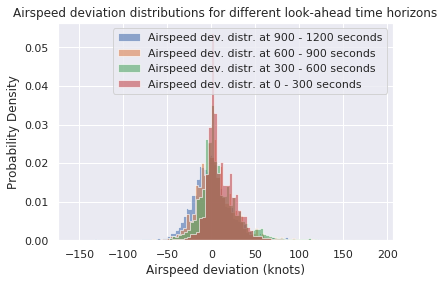

In [59]:
from matplotlib import mlab
fig, ax = plt.subplots(figsize=(6, 4))
range_lim = np.inf
dct = spd_dct

for i,la in enumerate(la_times[::-1]):

    la_lst = la_times[::-1] + [0]
    xtst = [x for x in dct[str(la)]['vals'] if ~np.isnan(x) and abs(x) < range_lim][:330000]
#     print(len(xtst))
    n_bins = 100

    # plot the cumulative histogram
    n, bins, patches = ax.hist(xtst, n_bins, normed=1, histtype='stepfilled',
                               cumulative=False, label='Airspeed dev. distr. at %s - %s seconds' % (la_lst[i+1], la), alpha=0.6)

plt.legend()#prop={'size': 10}
# plt.xlim(-200,200)
# plt.ylim(0,100000)
plt.xlabel('Airspeed deviation (knots)')
plt.ylabel('Probability Density')
plt.title('Airspeed deviation distributions for different look-ahead time horizons')
plt.show()

/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


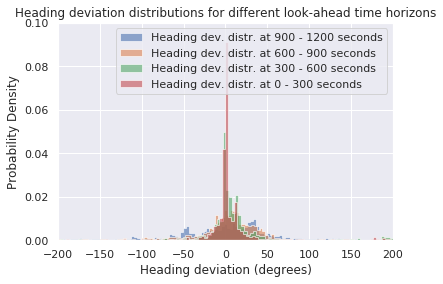

In [48]:
fig, ax = plt.subplots(figsize=(6,4))
range_lim = np.inf
dct = hdg_dct

for i,la in enumerate(la_times[::-1]):

    la_lst = la_times[::-1] + [0]
    xtst = [x for x in dct[str(la)]['vals'] if ~np.isnan(x) and abs(x) < range_lim][:330000]
    n_bins = 200

    # plot the cumulative histogram
    n, bins, patches = ax.hist(xtst, n_bins, normed=1, histtype='stepfilled',
                               cumulative=False, label='Heading dev. distr. at %s - %s seconds' % (la_lst[i+1], la), alpha=0.6)

plt.legend()
plt.xlim(-200,200)
plt.ylim(0,0.1)
plt.xlabel('Heading deviation (degrees)')
plt.ylabel('Probability Density')
plt.title('Heading deviation distributions for different look-ahead time horizons')
plt.show()

/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


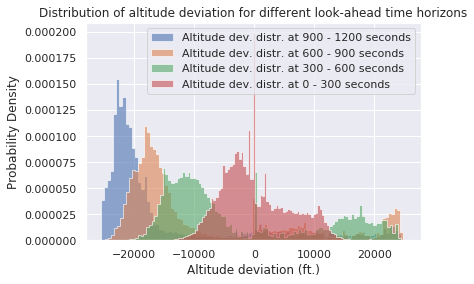

In [49]:
from matplotlib import mlab
fig, ax = plt.subplots(figsize=(6, 4))
range_lim = np.inf
dct = alt_dct

for i,la in enumerate(la_times[::-1]):

    la_lst = la_times[::-1] + [0]
    xtst = [x for x in dct[str(la)]['vals'] if ~np.isnan(x) and abs(x) < range_lim][:330000]
    n_bins = 100

    # plot the cumulative histogram
    n, bins, patches = ax.hist(xtst, n_bins, normed=1, histtype='stepfilled',
                               cumulative=False, label='Altitude dev. distr. at %s - %s seconds' % (la_lst[i+1], la), alpha=0.6)

plt.legend()
# plt.xlim(-200,200)
# plt.ylim(0,100000)
plt.xlabel('Altitude deviation (ft.)')
plt.ylabel('Probability Density')
plt.title('Distribution of altitude deviation for different look-ahead time horizons')
plt.show()

No handles with labels found to put in legend.


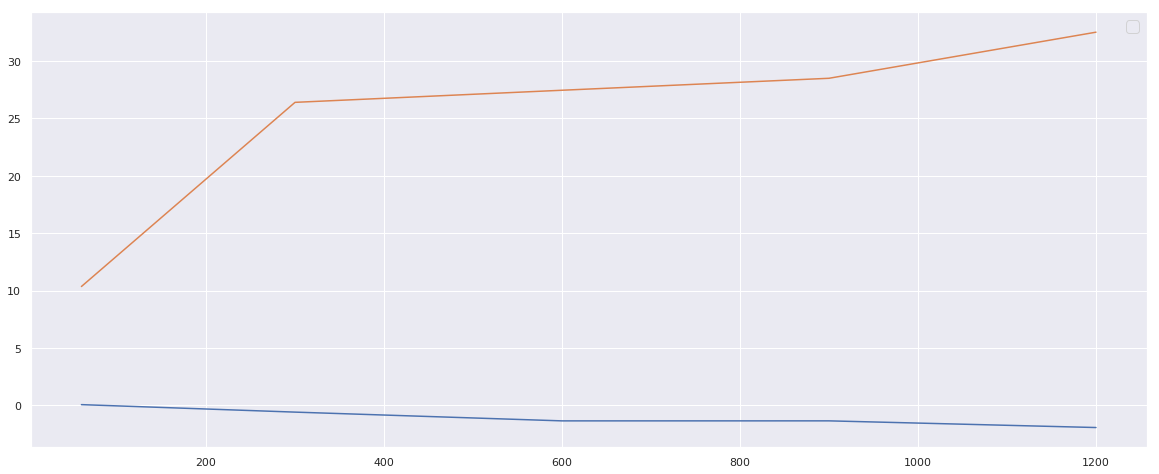

In [76]:
plt.figure(figsize=(20,8))
plt.plot(la_times, [hdg_dct[str(la)]['mean'] for la in la_times])
plt.plot(la_times, [hdg_dct[str(la)]['var'] for la in la_times])
# plt.plot(la_times, [alt_dct[str(la)]['skew'] for la in la_times])
# plt.plot(la_times, [alt_dct[str(la)]['kurt'] for la in la_times])
plt.legend(prop={'size': 16})
plt.show()

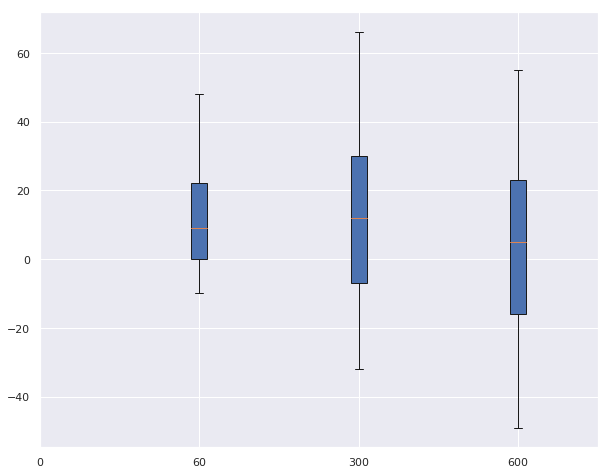

In [14]:
box_data = []
dct = spd_dct

for la in la_times:
    box_data.append((la, [i for i in dct[str(la)]['vals'] if ~np.isnan(i)]))
    
box_data_sort = sorted(box_data, key=lambda tup: tup[0])
box_data_2 = [i[1] for i in box_data_sort]

x = range(len(box_data_2)+1)

plt.figure(figsize=(10,8))
plt.boxplot(box_data_2, showfliers=False, patch_artist=True, whis=[5,95], widths = 0.1)
plt.xticks(x, ['0','60','300', '600', '900', '1200'])
# plt.xticks(rotation=70)
# plt.xlabel('Look-ahead time (seconds)')
# plt.ylabel('ATE in meters')
# plt.title('Evolution of ATE over look-ahead time')
# plt.legend(prop={'size': 16})
# plt.xlim((0,600))
plt.show()

In [31]:
df = pd.DataFrame()

df['spd'] = spd_dct['300']['vals']
df['alt'] = alt_dct['300']['vals']
df['hdg'] = hdg_dct['300']['vals']

spd_std = (df['spd']-np.mean(df['spd']))/np.std(df['spd'])
hdg_std = (df['hdg']-np.mean(df['hdg']))/np.std(df['hdg'])
alt_std = (df['alt']-np.mean(df['alt']))/np.std(df['alt'])

In [79]:
try:
    conn = psql.connect("dbname='thesisdata' user='postgres' host='localhost' password='postgres'")
except Exception as e:
    print("Unable to connect to the database.")
    print(e)

max_inserts = 100
fetch_batch_size = max_inserts
cnt = 0

cur_read = conn.cursor(cursor_factory=RealDictCursor)
cur_read.execute("SELECT * FROM public.projected_flights LIMIT 1000;")

fetch_batch_size = 1000

la_times = [5*x for x in range(1,121)]
alt_dct_2  = {}
spd_dct_2 = {}
hdg_dct_2 = {}

for la in la_times:
    alt_dct_2[str(la)] = []
    hdg_dct_2[str(la)] = []
    spd_dct_2[str(la)] = []

while True:
    
    batch = cur_read.fetchmany(size=fetch_batch_size)
    
    if not batch:
        break
    
    for f in batch:
        fdf = pd.DataFrame.from_dict(f)
        for i,la in enumerate(la_times):
            if i==0:
                alt_dct_2[str(la)].extend(fdf['alt'][(fdf['time_el'] <= la) & (fdf['time_el'] >= 0)].values - fdf['alt'][0])
                spd_dct_2[str(la)].extend(fdf['spd'][(fdf['time_el'] <= la) & (fdf['time_el'] >= 0)].values - fdf['spd'][0])
                hdg_dct_2[str(la)].extend(fdf['hdg'][(fdf['time_el'] <= la) & (fdf['time_el'] >= 0)].values - fdf['hdg'][0])
            else:
                alt_dct_2[str(la)].extend(fdf['alt'][(fdf['time_el'] <= la) & (fdf['time_el'] >= la_times[i-1])].values - fdf['alt'][0])
                spd_dct_2[str(la)].extend(fdf['spd'][(fdf['time_el'] <= la) & (fdf['time_el'] >= la_times[i-1])].values - fdf['spd'][0])
                hdg_dct_2[str(la)].extend(fdf['hdg'][(fdf['time_el'] <= la) & (fdf['time_el'] >= la_times[i-1])].values - fdf['hdg'][0])

cur_read.close()
conn.close()

In [80]:
acf = []
acf_t = []
dct = hdg_dct_2
for i,la in enumerate(la_times):
    
    if i > 0:
        
        x = [v for v in dct[str(la_times[0])] if ~np.isnan(v)]
        y = [v for v in dct[str(la)] if ~np.isnan(v)]
        print(len(x))
        print(len(y))
        acf.append(est_cr(x,y))
        acf_t.append(la)

17
140
17
236
17
307
17
335
17
339
17
324
17
315
17
323
17
317
17
306
17
359
17
371
17
352
17
374
17
369
17
372
17
372
17
393
17
413
17
443
17
415
17
422
17
451
17
480
17
493
17
503
17
491
17
508
17
498
17
534
17
575
17
550
17
533
17
575
17
572
17
537
17
568
17
580
17
612
17
633
17
649
17
651
17
695
17
696
17
662
17
685
17
687
17
640
17
638
17
660
17
676
17
697
17
771
17
742
17
761
17
711
17
790
17
789
17
830
17
780
17
792
17
783
17
822
17
829
17
835
17
910
17
874
17
946
17
948
17
1000
17
978
17
1022
17
1031
17
1015
17
1036
17
1058
17
1018
17
1069
17
1074
17
1100
17
1066
17
1143
17
1087
17
1160
17
1156
17
1153
17
1148
17
1143
17
1165
17
1149
17
1173
17
1143
17
1166
17
1152
17
1189
17
1194
17
1178
17
1150
17
1179
17
1199
17
1194
17
1184
17
1229
17
1188
17
1219
17
1246
17
1242
17
1260
17
1238
17
1278
17
1250
17
1220
17
1336
17
1258
17
1333
17
1344
17
1342
17
1380
17
1324


/home/victor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


In [52]:
x = [1,2,3,2,3,2,3,2,3]
n = len(x)
x = x-np.mean(x)
np.correlate(x,x, mode='full')[-n:]

array([ 4.        , -1.11111111,  0.77777778, -0.66666667,  0.22222222,
       -0.22222222, -0.33333333,  0.22222222, -0.88888889])

In [66]:
def est_acr(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    result = r/(variance*(np.arange(n, 0, -1)))
    return r

def est_cr(x,y):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = min(len(x),len(y))
    x = x[:n]
    y = y[:n]
    xstd = np.std(x)
    ystd = np.std(y)
    x = x-np.mean(x)
    y = y-np.mean(y)
    r = np.dot(x,y)/(n-1)
    result = r/(xstd*ystd)
    return result

In [58]:
est_acr(x)

array([ 4.        , -1.11111111,  0.77777778, -0.66666667,  0.22222222,
       -0.22222222, -0.33333333,  0.22222222, -0.88888889])

In [67]:
est_cr([1,2,3,4,5,6],[3,4,3,4,3,4,5,5,5])

0.35132402626147197

In [85]:
x = [v for v in dct['50'] if ~np.isnan(v)]
y = [v for v in dct['60'] if ~np.isnan(v)]
print(len(x))
print(len(y))
acf.append(est_cr(x,y))

317
359


In [60]:
for k in alt_dct.keys():
    print(k)
    print(['%s: %f' % (v,alt_dct[k][v]) for v in alt_dct[k].keys() if v != 'vals'])

300
['var: 2505.044015', 'mean: 2398.959638', 'kurt: -0.672242', 'skew: 0.636734']
600
['var: 4643.525097', 'mean: 4773.041554', 'kurt: -1.537781', 'skew: 0.164506']
900
['var: 5347.580403', 'mean: 4670.750328', 'kurt: -1.476330', 'skew: 0.322606']
1200
['var: 5651.676695', 'mean: 3460.725087', 'kurt: -0.721922', 'skew: 0.288921']


In [61]:
for k in hdg_dct.keys():
    print(k)
    print(['%s: %f' % (v,hdg_dct[k][v]) for v in hdg_dct[k].keys() if v != 'vals'])

300
['var: 32.419671', 'mean: 2.265867', 'kurt: 39.820466', 'skew: 1.589535']
600
['var: 42.118190', 'mean: 4.838037', 'kurt: 17.978997', 'skew: 1.464584']
900
['var: 48.787965', 'mean: 5.784098', 'kurt: 11.753794', 'skew: 1.076723']
1200
['var: 55.874551', 'mean: 5.596925', 'kurt: 8.235115', 'skew: 0.654731']


In [62]:
for k in spd_dct.keys():
    print(k)
    print(['%s: %f' % (v,spd_dct[k][v]) for v in spd_dct[k].keys() if v != 'vals'])

300
['var: 17.907760', 'mean: 10.185155', 'kurt: 7.750632', 'skew: 0.828732']
600
['var: 23.622394', 'mean: 9.905779', 'kurt: 4.436135', 'skew: 0.635340']
900
['var: 25.042409', 'mean: 7.000505', 'kurt: 13.371222', 'skew: 0.689380']
1200
['var: 27.759604', 'mean: 3.549938', 'kurt: 19.721374', 'skew: 0.773765']
